In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
data = pd.read_csv("mortgage.csv")
data.head(10)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
5,1,30,-7,25,113,40127.97,25.318291,9.2,212.73,2.274218,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
6,1,31,-7,25,113,39718.66,26.566117,9.2,200.67,1.850689,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
7,1,32,-7,25,113,35877.03,25.872559,9.2,186.12,1.104163,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
8,1,33,-7,25,113,34410.03,25.584425,9.2,180.52,0.836859,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
9,1,34,-7,25,113,33590.47,26.008073,9.2,173.35,-0.314448,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [4]:
data.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time'],
      dtype='object')

## EDA and Data Preparation

In [5]:
data.describe()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,6.224890e+05,622219.000000,622489.000000,622489.00000,622489.000000,...,622489.000000,622489.000000,6.224890e+05,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000
mean,25147.492561,35.800806,20.570057,24.607362,137.206527,2.459649e+05,83.078239,6.702451,184.10245,1.381032,...,0.612067,0.138226,2.562539e+05,673.616922,78.975460,5.649546,198.115217,0.024351,0.042714,0.109779
std,13750.200051,11.579971,7.615170,6.739015,19.532501,2.141563e+05,24.968839,2.079246,27.65077,1.964645,...,0.487280,0.345137,2.197181e+05,71.724558,10.127052,2.978061,33.964785,0.154135,0.202212,0.427967
min,1.000000,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,0.000000,0.000000,107.83000,-4.146711,...,0.000000,0.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,13580.000000,27.000000,18.000000,21.000000,137.000000,1.020174e+05,67.109446,5.650000,158.60000,1.104163,...,0.000000,0.000000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000
50%,24881.000000,34.000000,22.000000,25.000000,142.000000,1.806183e+05,82.253269,6.625000,180.52000,1.850689,...,1.000000,0.000000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000,0.000000,0.000000
75%,37045.000000,44.000000,25.000000,28.000000,145.000000,3.374950e+05,100.634381,7.875000,212.73000,2.694111,...,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.456000,222.390000,0.000000,0.000000,0.000000
max,50000.000000,60.000000,60.000000,60.000000,229.000000,8.701859e+06,803.513550,37.500000,226.29000,5.132464,...,1.000000,1.000000,8.000000e+06,840.000000,218.500000,19.750000,226.290000,1.000000,1.000000,2.000000


### Slicing the values of interest

#### Since for each ID we have records at multiple timestamp, we will only take that time stamp where the loan if payed off (0) or defaulted(1)

In [6]:
data["status_time"].value_counts()

0    580742
2     26589
1     15158
Name: status_time, dtype: int64

In [7]:
target_ids = data[data["status_time"].isin([1,2])]["id"].unique()
df = data[data["id"].isin(target_ids)]
df.shape

(379066, 23)

In [8]:
df.drop(columns=['orig_time','first_time','mat_time'],inplace=True)

In [9]:
df = df.sort_values(['id','time'])
df.head()

,id,time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,41303.42,24.498336,9.2,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,41061.95,24.483867,9.2,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,40804.42,24.626795,9.2,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,40483.89,24.735883,9.2,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,40367.06,24.925476,9.2,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


#### The GDP and Unemployement Rate were recorded at the time of observation however we need the data at the time of origin so we consider the GDP and UER from first recorded timestamp as the origin value

In [10]:
gdp_uer = df.groupby('id').first().reset_index()
gdp_uer = gdp_uer[['id','gdp_time','uer_time']]
gdp_uer.columns = ['id','gdp_origin','uer_orgin']
print(df.shape)
df = df.merge(gdp_uer,on='id',how='left')
print(df.shape)

(379066, 20)
(379066, 22)


In [11]:
df.columns

Index(['id', 'time', 'balance_time', 'LTV_time', 'interest_rate_time',
       'hpi_time', 'gdp_time', 'uer_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'hpi_orig_time', 'default_time',
       'payoff_time', 'status_time', 'gdp_origin', 'uer_orgin'],
      dtype='object')

In [12]:
df_final = df[df['status_time'].isin([1,2])]
df_final.drop(columns=['time','balance_time','LTV_time', 'interest_rate_time',
       'hpi_time', 'gdp_time', 'uer_time','default_time',
       'payoff_time'],inplace=True)
print(df_final.shape)
print(df_final.columns)

(41747, 13)
Index(['id', 'REtype_CO_orig_time', 'REtype_PU_orig_time',
       'REtype_SF_orig_time', 'investor_orig_time', 'balance_orig_time',
       'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time',
       'hpi_orig_time', 'status_time', 'gdp_origin', 'uer_orgin'],
      dtype='object')


In [13]:
df_final["status_time"] =np.where(df_final['status_time'] == 2, 0,1)

In [14]:
df_final['status_time'].value_counts()

0    26589
1    15158
Name: status_time, dtype: int64

In [15]:
df_final

,id,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time,gdp_origin,uer_orgin
23,1,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,2.899137,4.7
25,2,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,2.899137,4.7
30,3,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,2.899137,4.7
33,5,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,2.899137,4.7
64,6,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,2.899137,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379048,49967,0,1,0,1,242000.0,691,67.2,7.000,226.29,0,1.081049,8.0
379051,49970,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1.081049,8.0
379056,49972,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,1.081049,8.0
379061,49983,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1.081049,8.0


### Box and Whisker plot to get data Quartiles

#### The box and whisker gives the data between Q1-1.5IQR and Q3+1.5IQR and the points above and below are potential outliers

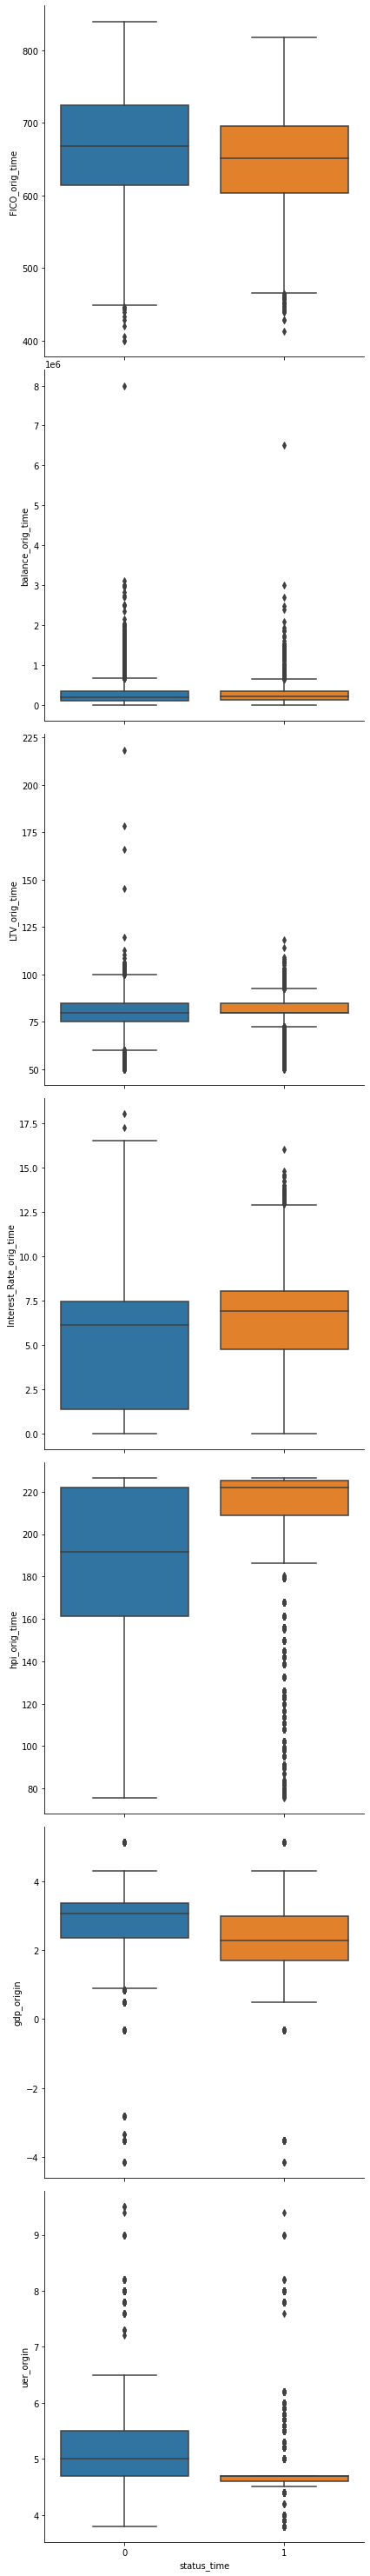

In [16]:
g = sns.PairGrid(df_final, y_vars=["FICO_orig_time","balance_orig_time","LTV_orig_time","Interest_Rate_orig_time","hpi_orig_time","gdp_origin","uer_orgin"], x_vars=["status_time"], height= 6)
g.map(sns.boxplot)

### Getting the pairplots to see how data is distributed wrt to features and also Histogram of features (diagonal plot)

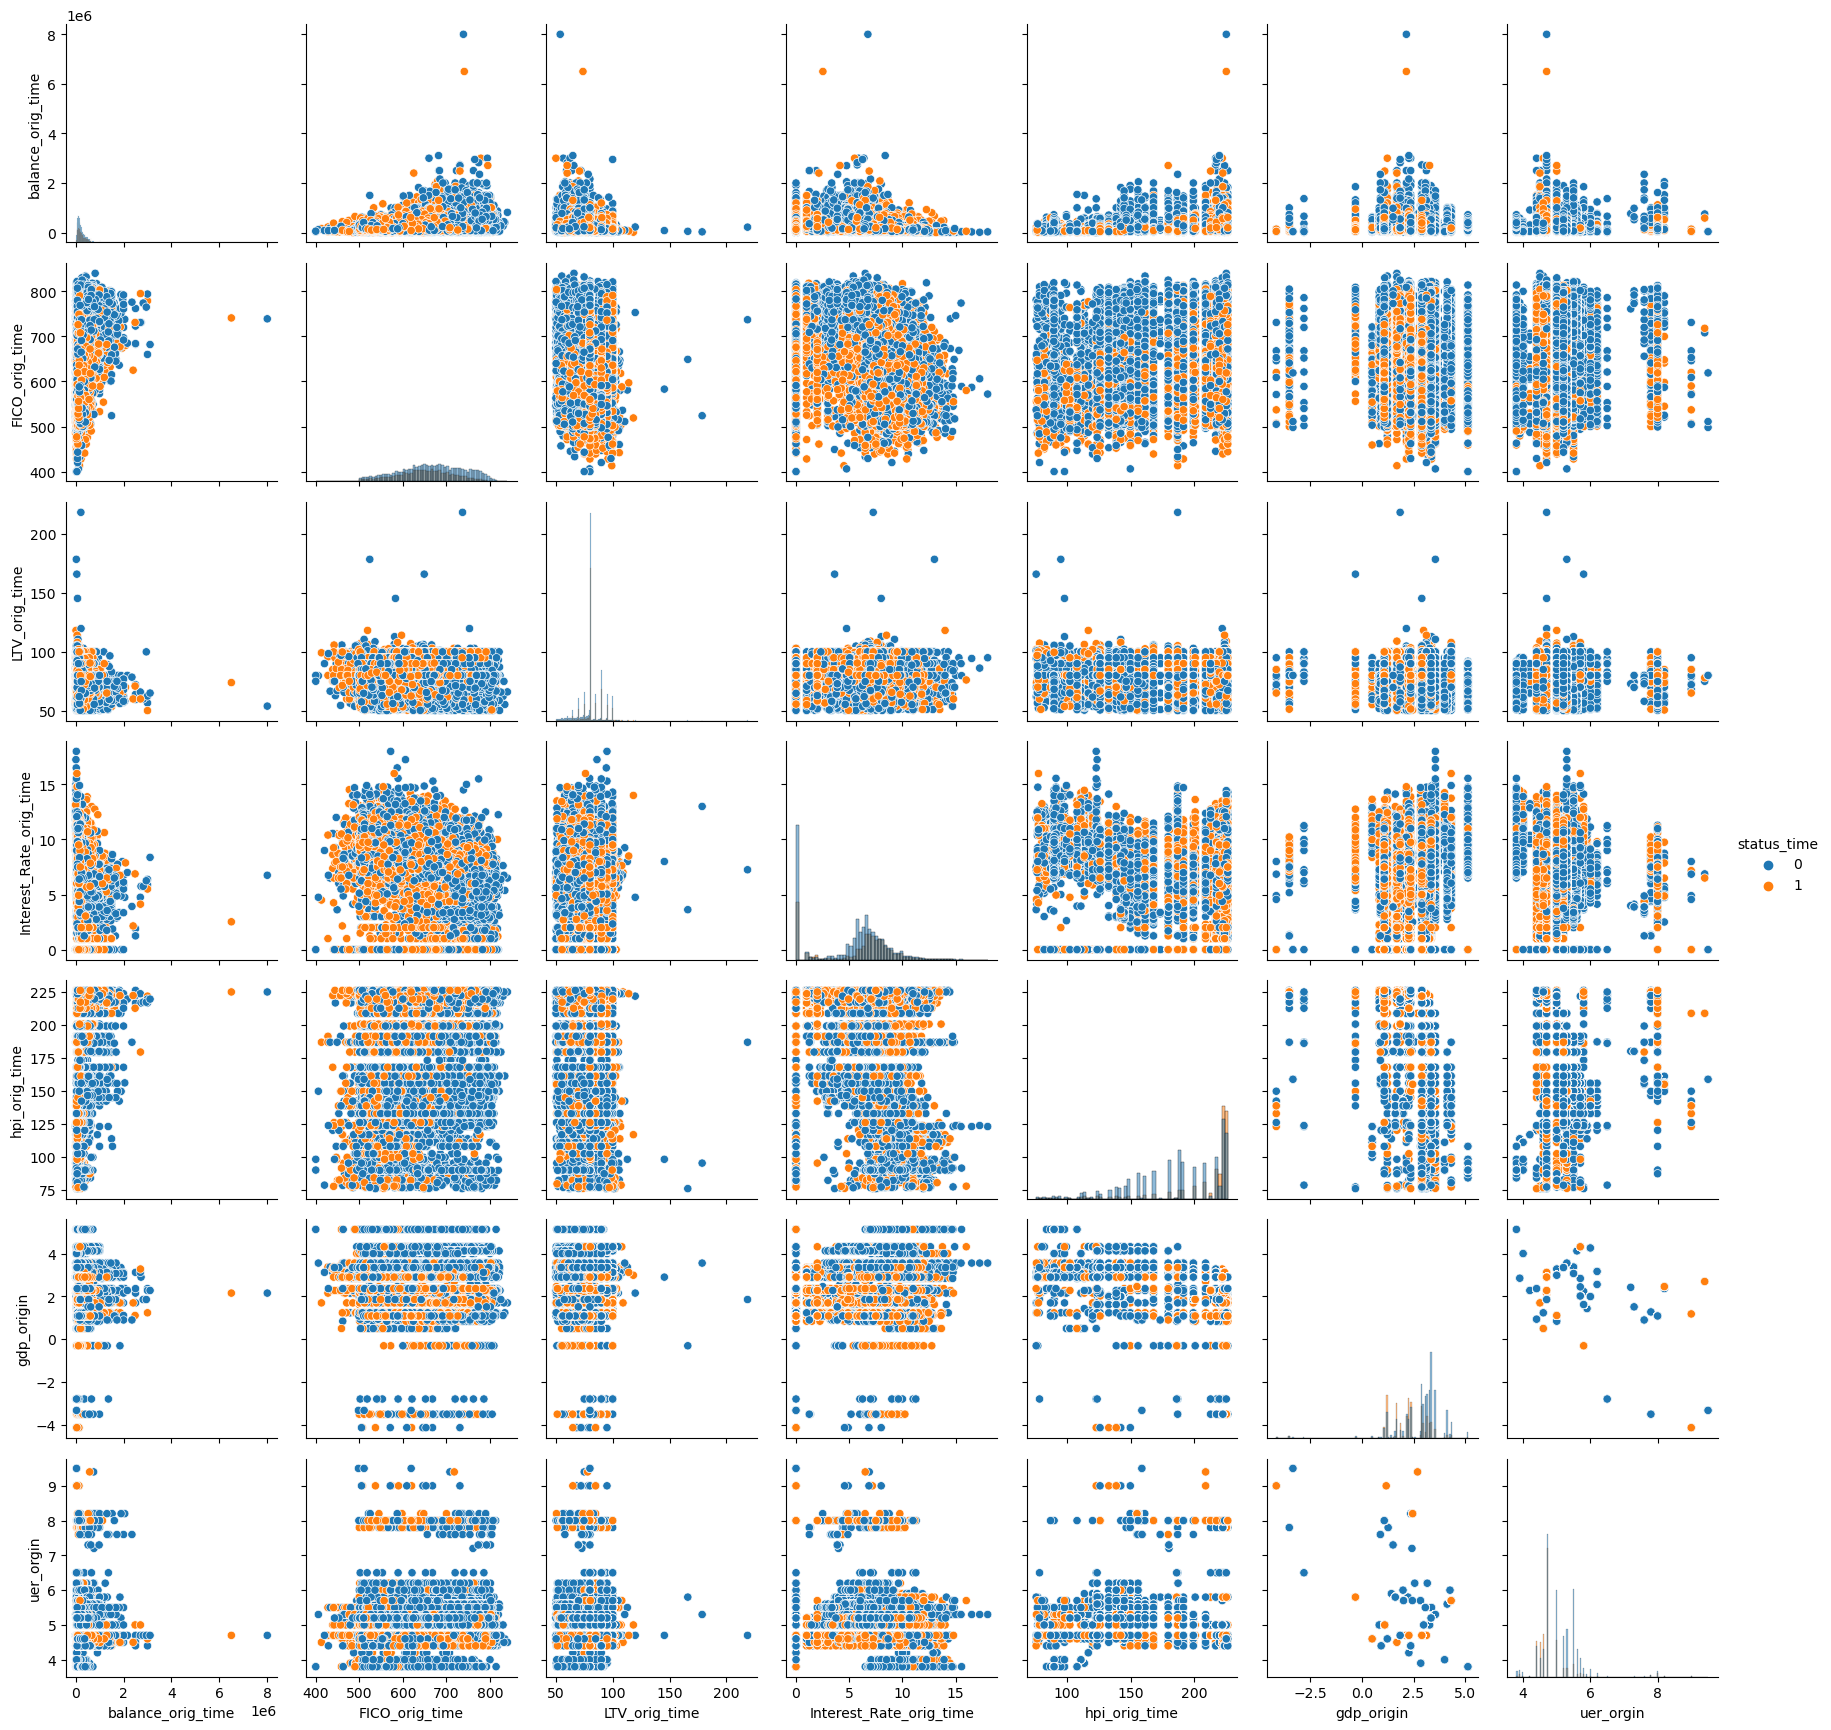

In [18]:
df_plot = df_final[['balance_orig_time',
       'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time',
       'hpi_orig_time', 'status_time', 'gdp_origin', 'uer_orgin']]
g = sns.PairGrid(df_plot, hue="status_time")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Plotting the Probability Density Function and Target wise Data Spread for each Continuous Feature

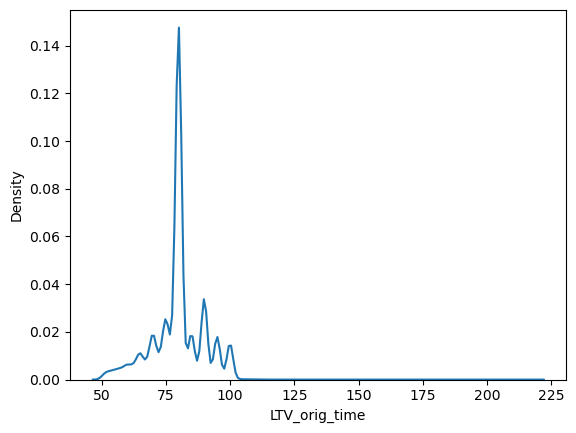

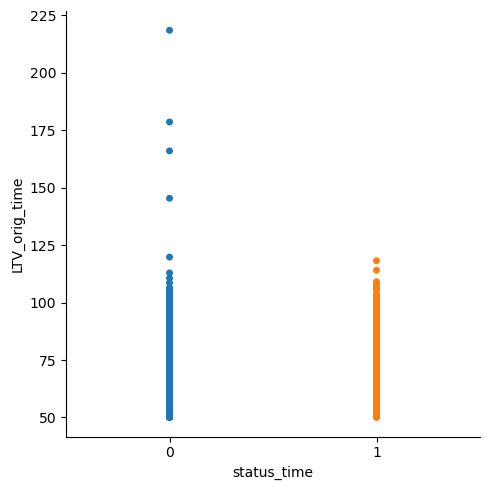

In [19]:
sns.kdeplot(df_final["LTV_orig_time"])
sns.catplot(x="status_time",y="LTV_orig_time",data=df_final,jitter=False)

#### The PDF of LTV ratio shows a thin tailed right skewness which indicates presence of high value outliers, to deal with this we use Chebyshev's Theorem to only consider atleast 96% of the values (k=5) and cap values till 5 Standard Deviations right of the mean

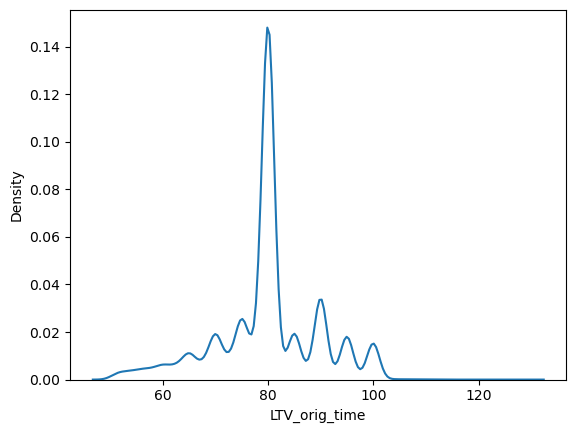

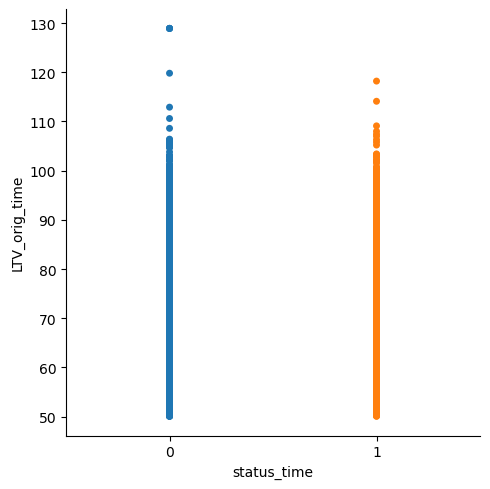

In [20]:
LTV_sd = np.std(df_final["LTV_orig_time"])
LTV_mean = np.mean(df_final["LTV_orig_time"])
k = 5
LTV_cap = LTV_mean+k*LTV_sd
df_final["LTV_orig_time"] = np.where(df_final["LTV_orig_time"]>LTV_cap,LTV_cap,df_final["LTV_orig_time"])
sns.kdeplot(df_final["LTV_orig_time"])
sns.catplot(x="status_time",y="LTV_orig_time",data=df_final,jitter=False)

<AxesSubplot:xlabel='balance_orig_time', ylabel='Density'>

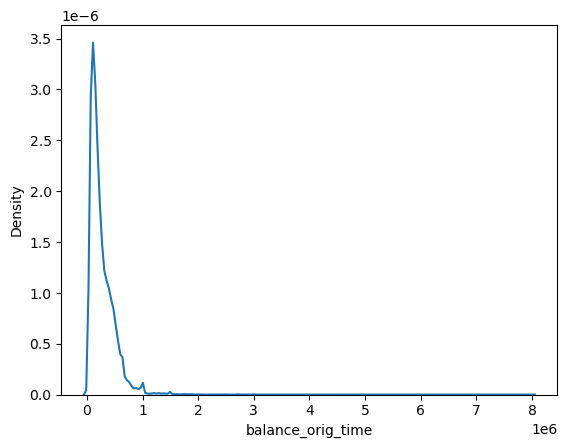

In [21]:
sns.kdeplot(df["balance_orig_time"])

#### We again see a similar outlier trend in Balance and use the above methodology to cap the outliers

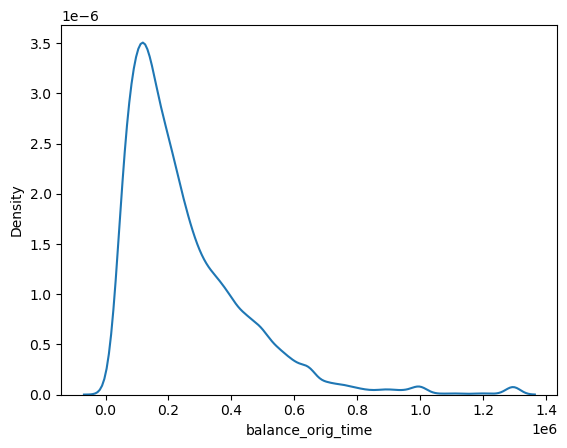

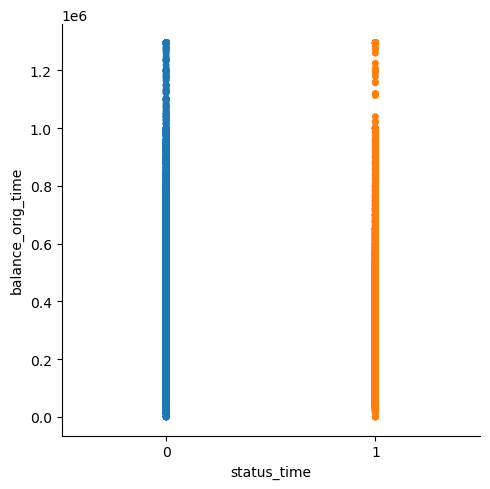

In [22]:
bal_sd = np.std(df_final["balance_orig_time"])
bal_mean = np.mean(df_final["balance_orig_time"])
bal_cap = bal_mean+k*bal_sd

df_final["balance_orig_time"] = np.where(df_final["balance_orig_time"]>bal_cap,bal_cap,df_final["balance_orig_time"])
sns.kdeplot(df_final["balance_orig_time"])
sns.catplot(x="status_time",y="balance_orig_time",data=df_final,jitter=False)

In [23]:
#aux function to plot 100% Stacked Bar Graph


def percent_stack_bar(x,y,data):
    df = data[[x,y]]
    cross_tab_prop = pd.crosstab(index=df[x],columns=df[y],normalize='index')
    cross_tab = pd.crosstab(index=df[x],columns=df[y])
    cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set3', 
                    figsize=(10, 6))

    plt.legend(title= "status",loc="lower left", ncol=2)
    plt.xlabel(x)
    plt.ylabel("Proportion")
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):

            plt.text(x=n - 0.17,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=12,
                     fontweight="bold")

    plt.show()

### We use a 100% Stacked Bar Graph to see the distribution of the target variable with respect to the categorical features. 

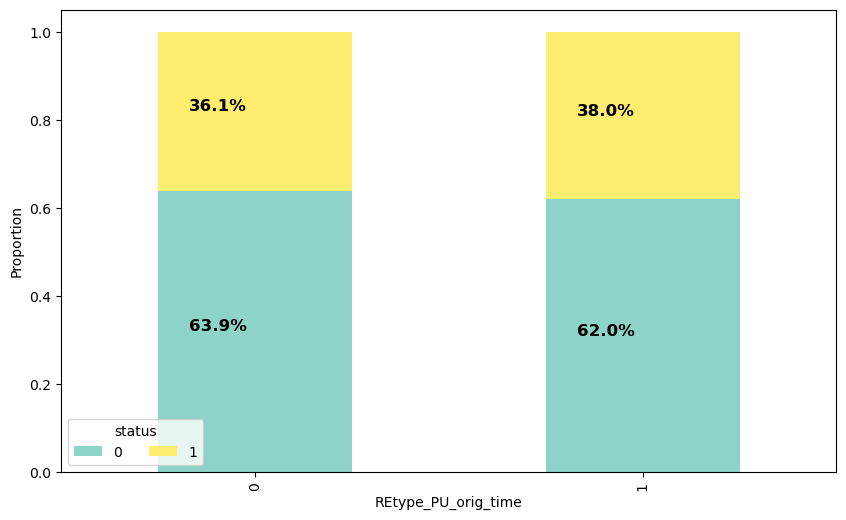

In [24]:
percent_stack_bar(x="REtype_PU_orig_time",y="status_time",data=df_final)

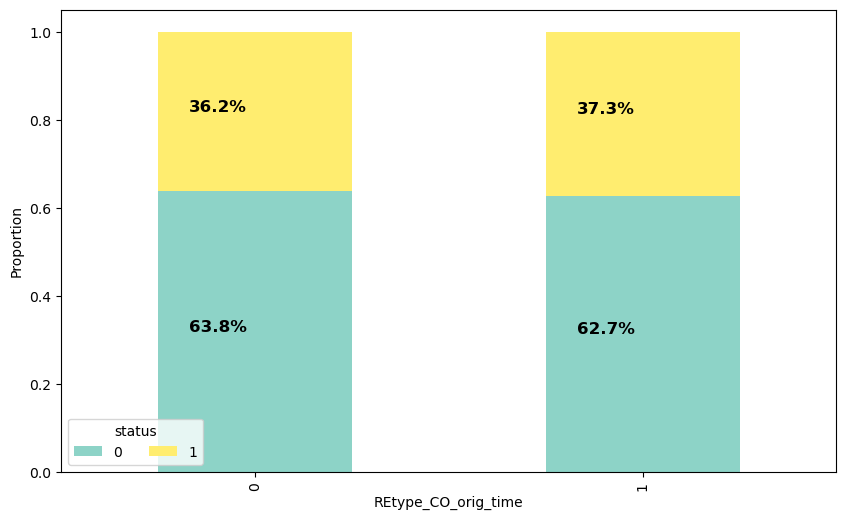

In [25]:
percent_stack_bar(x="REtype_CO_orig_time",y="status_time",data=df_final)

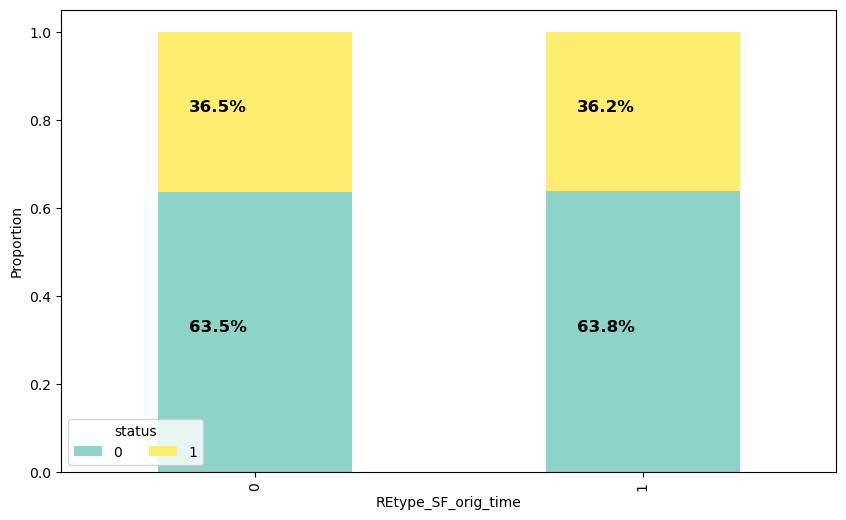

In [26]:
percent_stack_bar(x="REtype_SF_orig_time",y="status_time",data=df_final)

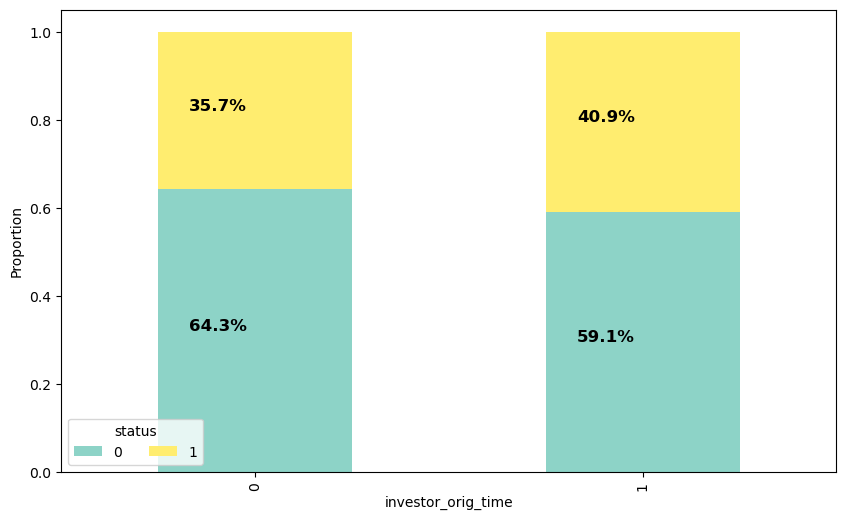

In [27]:
percent_stack_bar(x="investor_orig_time",y="status_time",data=df_final)

In [47]:
#aux function to calculate weight of evidence and information value for binary categorical feature

def woe(var,target,data):
    cross_tab = pd.crosstab(index= data[target], columns= data[var])
    cross_tab[0] = cross_tab[0]/cross_tab[0].sum()
    cross_tab[1] = cross_tab[1]/cross_tab[1].sum()
    woe0 = np.log(cross_tab[0][1]/cross_tab[0][0])
    woe1 = np.log(cross_tab[1][1]/cross_tab[1][0])
    print(f"Weight of Evidences for {var}: \n 0:{woe0} \n 1: {woe1}")
    IV = (cross_tab[0][1]-cross_tab[0][0])*woe0 + (cross_tab[1][1]-cross_tab[1][0])*woe1
    print("Information Value:",IV)

### Checking the Information Value for all the Binary Categorical Features by calculating Weight of Evidences. Most of them lie in the range 0.2 - 0.3 (Medium Predictors)

In [49]:
woe(var="REtype_PU_orig_time",target="status_time",data=df_final)
woe(var="REtype_CO_orig_time",target="status_time",data=df_final)
woe(var="investor_orig_time",target="status_time",data=df_final)
woe(var="REtype_SF_orig_time",target="status_time",data=df_final)

Weight of Evidences for REtype_PU_orig_time: 
 0:-0.5714104543537334 
 1: -0.4914265847418774
Information Value: 0.2773305573224766
Weight of Evidences for REtype_CO_orig_time: 
 0:-0.5650484749486496 
 1: -0.5184213365925743
Information Value: 0.28697318510793857
Weight of Evidences for investor_orig_time: 
 0:-0.5877950849266215 
 1: -0.36843024752670966
Information Value: 0.23505669675632226
Weight of Evidences for REtype_SF_orig_time: 
 0:-0.5523390137990035 
 1: -0.5677510583294508
Information Value: 0.3057523739424831


## Model Building

In [62]:
y = df_final["status_time"]
X = df_final.drop(columns=["status_time","id"])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Here we would be using two ensemble techniques - XGBoost and Random Forest and Comparing how they perform

In [130]:
clf_xgb = xgb.XGBClassifier(max_depth=5,scale_pos_weight=1.03,eta=0.05)
clf_rf = RandomForestClassifier(criterion='entropy',max_depth=5,n_jobs=-1,oob_score=True)

#### Using 5-Fold Cross Validation to find Average Train and Test Accuracy in both Models

In [117]:
results_xgb = cross_validate(estimator=clf_xgb,
                               X=X,
                               y=y,
                               cv= 5,
                               scoring= "accuracy",
                               return_train_score=True)
print("Train Scores:",results_xgb["train_score"])
print("Train Average", np.average(results_xgb["train_score"]))
print("Test Scores:", results_xgb["test_score"])
print("Test Average", np.average(results_xgb["test_score"]))

Train Scores: [0.75479834 0.74767195 0.74684113 0.75375771 0.74348763]
Train Average 0.7493113508011363
Test Scores: [0.7108982  0.74359281 0.74128638 0.70786921 0.75374296]
Test Average 0.731477913737742


In [131]:
results_rf = cross_validate(estimator=clf_rf,
                               X=X,
                               y=y,
                               cv= 5,
                               scoring= "accuracy",
                               return_train_score=True)
print("Train Scores:",results_rf["train_score"])
print("Train Average", np.average(results_rf["train_score"]))
print("Test Scores:", results_rf["test_score"])
print("Test Average", np.average(results_rf["test_score"]))

Train Scores: [0.74126419 0.72919723 0.73276843 0.73711001 0.72854662]
Train Average 0.7337772948165681
Test Scores: [0.70694611 0.74586826 0.73637561 0.70595281 0.74667625]
Test Average 0.728363808495119


In [133]:
model_xgb = clf_xgb.fit(X_train,y_train)
model_rf = clf_rf.fit(X_train,y_train)

## Model Testing


In [138]:
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)

### Checking Accuracy for both Models

In [139]:
print("XGB Accuracy: ", np.round(accuracy_score(y_test,y_pred_xgb)*100,2),"%")
print("RandomForest Accuracy: ", np.round(accuracy_score(y_test,y_pred_rf)*100,2),"%")

XGB Accuracy:  74.16 %
RandomForest Accuracy:  73.41 %


### Checking Precision, Recall, F1 Score and plotting Confusion Matrix for XGBoost

Precision:  0.6605005440696409
Recall:  0.5984226092671705
F1-Score:  0.6279310344827584


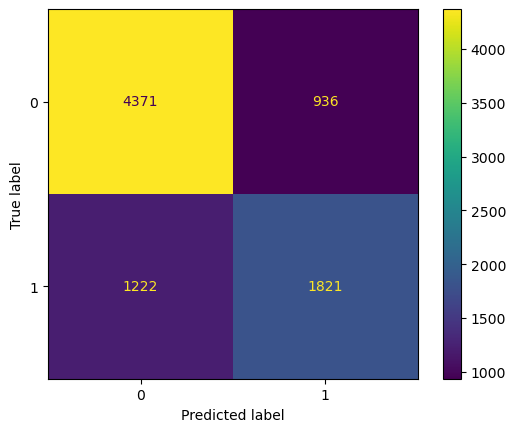

In [144]:
p = precision_score(y_test,y_pred_xgb)
r = recall_score(y_test,y_pred_xgb)
f1 = f1_score(y_test,y_pred_xgb)
print("Precision: ",p)
print("Recall: ",r)
print("F1-Score: ",f1)

cm = confusion_matrix(y_test,y_pred_xgb, labels= clf_xgb.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels= clf_xgb.classes_)
disp.plot()

### Checking Precision, Recall, F1 Score and plotting Confusion Matrix for Random Forest

Precision:  0.6517890077462191
Recall:  0.5806769635228393
F1-Score:  0.6141814389989572


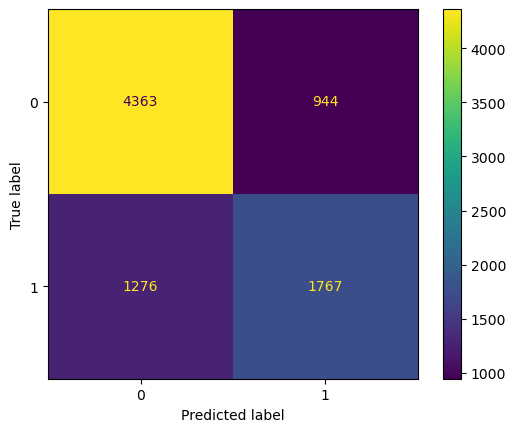

In [145]:
p = precision_score(y_test,y_pred_rf)
r = recall_score(y_test,y_pred_rf)
f1 = f1_score(y_test,y_pred_rf)
print("Precision: ",p)
print("Recall: ",r)
print("F1-Score: ",f1)

cm = confusion_matrix(y_test,y_pred_rf, labels= clf_rf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels= clf_rf.classes_)
disp.plot()